In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision

In [30]:
# Load Data
train_dataset = datasets.CIFAR10(root = 'dataset/', train = True, transform = transforms.ToTensor(), download = True)
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)

def get_mean_std(loader):
    # VAR[X] = E[X**2] - E[X]**2
    channels_sum, channels_squared_sum, num_batches = 0,0, 0
    
    for data, _ in loader:
        channels_sum += torch.mean(data, dim = [0, 2, 3])
        channels_squared_sum += torch.mean(data**2, dim = [0, 2, 3])
        num_batches += 1
    mean = channels_sum / num_batches
    std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5
    
    return mean, std

mean, std = get_mean_std(train_loader)
# Mean and Standard Deviation of Each Channel
# Can use these for Normalization
print(mean)
print(std)

Files already downloaded and verified
tensor([0.4914, 0.4822, 0.4466])
tensor([0.2470, 0.2435, 0.2616])


In [3]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()

    def forward(self, x):
        return x

def initialize_weights(model):
        # track all layers
        for m in model.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_uniform_(m.weight)

                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

            elif isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight)
                nn.init.constant_(m.bias, 0)

In [4]:
torch.manual_seed(1)
torch.cuda.manual_seed(1)

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = torchvision.models.vgg16(pretrained=True)
model.avgpool = Identity()
model.classifier = nn.Linear(512, 10)
model.to(device)
initialize_weights(model)

learning_rate = 1e-1
num_epochs = 5

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
mean, std = get_mean_std(train_loader)
normalize = transforms.Normalize(mean, std)

for epoch in range(num_epochs):
    losses = []
    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data.to(device)
        targets = targets.to(device)
        data = normalize(data)
        scores = model(data)
        loss = criterion(scores, targets)

        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"epoch : {epoch}    cost : {sum(losses)/len(losses)}")

epoch : 0    cost : 2.253368236343312e+16
epoch : 1    cost : 2.309406103075618
epoch : 2    cost : 2.3109473590655707
epoch : 3    cost : 2.31189597476169
epoch : 4    cost : 2.311768187281421


In [7]:

model = torchvision.models.vgg16(pretrained=True)
model.avgpool = Identity()
model.classifier = nn.Linear(512, 10)
model.to(device)
initialize_weights(model)

learning_rate = 1e-1
num_epochs = 5

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
mean, std = get_mean_std(train_loader)
normalize = transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))

for epoch in range(num_epochs):
    losses = []
    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data.to(device)
        targets = targets.to(device)
        data = normalize(data)
        scores = model(data)
        loss = criterion(scores, targets)

        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"epoch : {epoch}    cost : {sum(losses)/len(losses)}")

KeyboardInterrupt: ignored

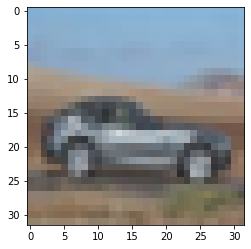

In [35]:
import matplotlib.pyplot as plt
import numpy as np

sample = next(iter(train_loader))[:-1][0][0]
sample1 = sample
sample2 = sample
sample_numpy = sample.numpy()
plt.imshow(sample_numpy.transpose(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


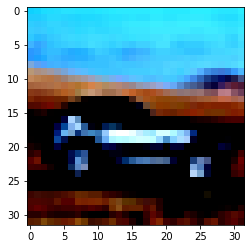

In [36]:
mean, std = get_mean_std(train_loader)
normalize = transforms.Normalize(mean, std)
sample = normalize(sample1)
sample_numpy = sample.numpy()
plt.imshow(sample_numpy.transpose(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


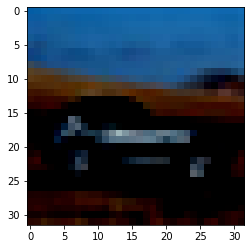

In [37]:
normalize = transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
sample = normalize(sample2)
sample_numpy = sample.numpy()
plt.imshow(sample_numpy.transpose(1,2,0))